In [1]:
%load_ext autoreload
%autoreload 2


# EDA New or Used

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def load_data(file_path):
    return pd.read_json(file_path, lines=True)

file_path = "../data/raw/MLA_100k_checked_v3.jsonlines"
df = load_data(file_path)


seller_address                              object
warranty                                    object
sub_status                                  object
condition                                   object
deal_ids                                    object
base_price                                 float64
shipping                                    object
non_mercado_pago_payment_methods            object
seller_id                                    int64
variations                                  object
site_id                                     object
listing_type_id                             object
price                                      float64
attributes                                  object
buying_mode                                 object
tags                                        object
listing_source                              object
parent_item_id                              object
coverage_areas                              object
category_id                    

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,...,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],...,2015-11-04 20:42:53,active,None,NaN,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],...,2015-11-25 18:08:30,active,None,NaN,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],...,2015-11-08 23:57:07,active,None,NaN,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],...,2015-12-04 01:13:16,active,None,NaN,NaN,1,2015-09-28 18:47:56,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],...,2015-10-23 22:07:20,active,None,NaN,NaN,1,2015-08-24 22:07:20,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1


In [4]:
# Convertir a datetime
df["date_created"] = pd.to_datetime(df["date_created"], errors='coerce')
df["last_updated"] = pd.to_datetime(df["last_updated"], errors='coerce')


# Exploración de calidad de datos

In [5]:
df_temp = df.copy()
for col in df_temp.columns:
    if df_temp[col].apply(lambda x: isinstance(x, (dict, list))).any():
        df_temp[col] = df_temp[col].astype(str)

for col in df_temp.columns[:10]:
    print(f"\n Columna: {col}")
    print(df_temp[col].value_counts(dropna=False))



 Columna: seller_address
seller_address
{'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'CABA', 'id': ''}}                          4082
{'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'Capital Federal', 'id': ''}}               3334
{'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'Palermo', 'id': 'TUxBQlBBTDI1MTVa'}}       3305
{'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'Buenos Aires', 'id': ''}}                  3138
{'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'Caballito', 'id': 'TUxBQkNBQjM4MDda'}}     2909
                                                                                                                                      

In [6]:
for col in df_temp.columns[10:20]:
    print(f"\n Columna: {col}")
    print(df_temp[col].value_counts(dropna=False))



 Columna: site_id
site_id
MLA    100000
Name: count, dtype: int64

 Columna: listing_type_id
listing_type_id
bronze          63170
free            21388
silver           9114
gold_special     3023
gold             2445
gold_premium      842
gold_pro           18
Name: count, dtype: int64

 Columna: price
price
50.00       3209
100.00      2833
150.00      2492
60.00       2111
200.00      1970
            ... 
4529.00        1
8839.90        1
1177.00        1
19450.00       1
4245.66        1
Name: count, Length: 10331, dtype: int64

 Columna: attributes
attributes
[]                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [7]:
for col in df_temp.columns[20:30]:
    print(f"\n Columna: {col}")
    print(df_temp[col].value_counts(dropna=False))



 Columna: descriptions
descriptions
[]                                       2688
["{'id': 'MLA4695330653-912855983'}"]       1
["{'id': 'MLA5935841584-908398166'}"]       1
["{'id': 'MLA8441753636-926508210'}"]       1
["{'id': 'MLA7990148772-898793381'}"]       1
                                         ... 
["{'id': 'MLA2857846687-936247635'}"]       1
["{'id': 'MLA7675068934-904476069'}"]       1
["{'id': 'MLA7460941130-940449329'}"]       1
["{'id': 'MLA6220495235-927725554'}"]       1
["{'id': 'MLA9372431786-925955158'}"]       1
Name: count, Length: 97313, dtype: int64

 Columna: last_updated
last_updated
2015-09-18 13:21:40+00:00    7
2015-09-18 13:20:41+00:00    6
2015-09-30 12:20:39+00:00    6
2015-09-18 13:21:30+00:00    6
2015-09-18 13:21:35+00:00    6
                            ..
2015-10-14 08:01:32+00:00    1
2015-10-10 12:57:01+00:00    1
2015-09-19 00:53:06+00:00    1
2015-09-05 16:39:02+00:00    1
2015-09-21 13:02:18+00:00    1
Name: count, Length: 95124, dtype: int

In [8]:
for col in df_temp.columns[30:45]:
    print(f"\n Columna: {col}")
    print(df_temp[col].value_counts(dropna=False))



 Columna: thumbnail
thumbnail
                                                                          789
http://www.mercadolibre.com/jm/img?s=STC&v=I&f=proccesing_image_es.jpg     37
http://mla-s1-p.mlstatic.com/6279-MLApp_27_21489919_1-I.jpg                 4
http://mla-s1-p.mlstatic.com/6270-MLApp_27_19602074_1-I.jpg                 2
http://mla-s1-p.mlstatic.com/5386-MLA4695330653_052013-I.jpg                1
                                                                         ... 
http://mla-s2-p.mlstatic.com/23354-MLA7407872171_022015-I.jpg               1
http://mla-s1-p.mlstatic.com/19984-MLA3553088782_102014-I.jpg               1
http://mla-s1-p.mlstatic.com/679701-MLA9051601035_092015-I.jpg              1
http://mla-s2-p.mlstatic.com/10312-MLA2530314049_012014-I.jpg               1
http://mla-s1-p.mlstatic.com/763101-MLA9372431786_032015-I.jpg              1
Name: count, Length: 99172, dtype: int64

 Columna: title
title
50 Suspensores Para Short De Baño Tela Calada  

In [9]:
# Calcular valores faltantes
missing_data = df.isnull().sum()
total_rows = len(df)

# Crear resumen con porcentaje y tipo de dato
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': (missing_data.values / total_rows) * 100,
    'Data_Type': df.dtypes.values
})

# Identificar tipos de columnas
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns
datetime_columns = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns

# Clasificar tipo de variable
missing_summary['Variable_Type'] = missing_summary['Column'].apply(
    lambda x: (
        'Numerical' if x in numerical_columns else
        'Categorical' if x in categorical_columns else
        'Datetime' if x in datetime_columns else
        'Other'
    )
)

# Ordenar por mayor cantidad de valores faltantes
missing_summary = missing_summary.sort_values(by='Missing_Count', ascending=False).reset_index(drop=True)

# Mostrar dimensiones del dataset
print("Dimensiones del dataset:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print('--------')

# Conteo absoluto y porcentaje por categoría en 'condition'
condition_counts = df["condition"].value_counts()
condition_percentages = df["condition"].value_counts(normalize=True) * 100

# Unir ambos en un solo DataFrame
condition_summary = pd.DataFrame({
    "Count": condition_counts,
    "Percentage": condition_percentages.round(2)
})
print("Valores distintos en variable 'condition':")
print(condition_summary)
print('--------')

# Mostrar resumen de valores faltantes y tipos
print("Resumen de valores faltantes y tipos de variables:")
# display(missing_summary)
missing_summary


Dimensiones del dataset:
Filas: 100000, Columnas: 45
--------
Valores distintos en variable 'condition':
           Count  Percentage
condition                   
new        53758       53.76
used       46242       46.24
--------
Resumen de valores faltantes y tipos de variables:


,Column,Missing_Count,Missing_Percentage,Data_Type,Variable_Type
0,differential_pricing,100000,100.000,float64,Numerical
1,subtitle,100000,100.000,float64,Numerical
2,catalog_product_id,99989,99.989,float64,Numerical
3,original_price,99857,99.857,float64,Numerical
4,official_store_id,99182,99.182,float64,Numerical
5,video_id,97015,97.015,object,Categorical
6,warranty,60896,60.896,object,Categorical
7,parent_item_id,23011,23.011,object,Categorical
8,automatic_relist,0,0.000,bool,Other
9,accepts_mercadopago,0,0.000,bool,Other


/tmp/ipykernel_27106/2040609312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="condition", data=df, palette='inferno')


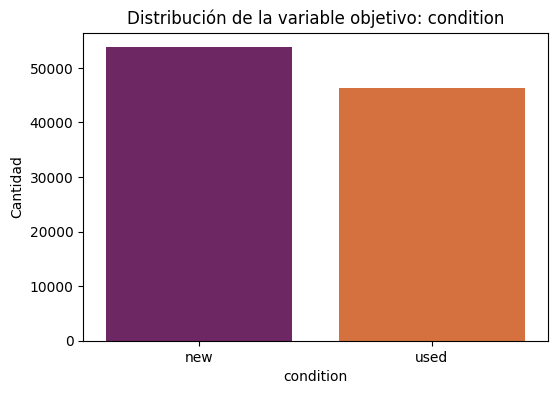

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="condition", data=df, palette='inferno')
plt.title("Distribución de la variable objetivo: condition")
plt.ylabel("Cantidad")
plt.show()


La variable objetivo (`condition`) presenta una distribución balanceada entre ítems nuevos y usados, lo cual es ideal para modelado supervisado. Esta proporción cercana al 50/50 permite utilizar **accuracy** como métrica principal sin riesgo de sesgo por desbalance de clases, asegurando una evaluación justa del rendimiento del modelo.

/tmp/ipykernel_27106/2819845638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="condition", y="price", palette='inferno')


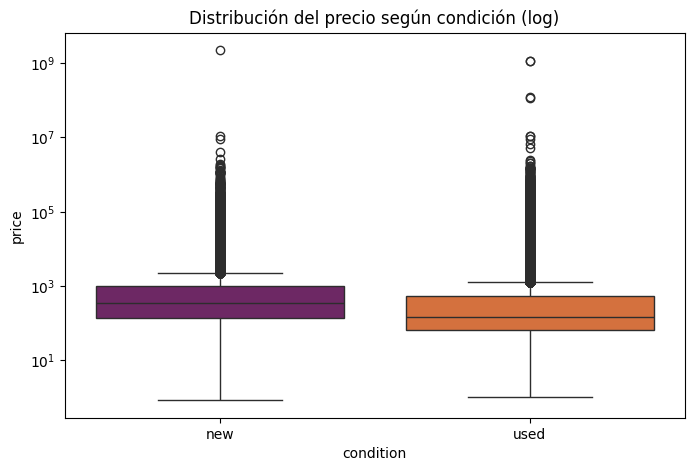

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="condition", y="price", palette='inferno')
plt.yscale("log")
plt.title("Distribución del precio según condición (log)")
plt.show()


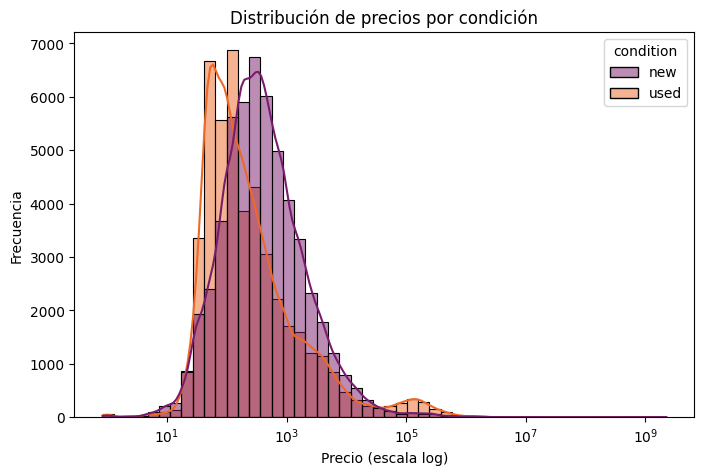

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='price', hue='condition', log_scale=True, bins=50, palette='inferno', kde=True)
plt.title('Distribución de precios por condición')
plt.xlabel('Precio (escala log)')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra que los productos nuevos tienden a tener precios más altos y mayor dispersión que los usados, con un claro sesgo a la derecha en ambas distribuciones. Usar una escala logarítmica permite evidenciar el solapamiento en rangos bajos, pero también cómo los productos nuevos dominan en precios más altos.

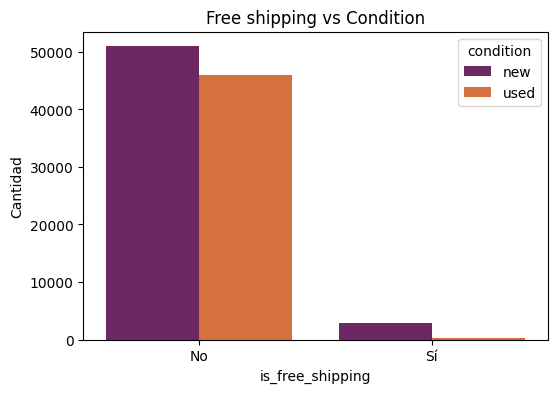

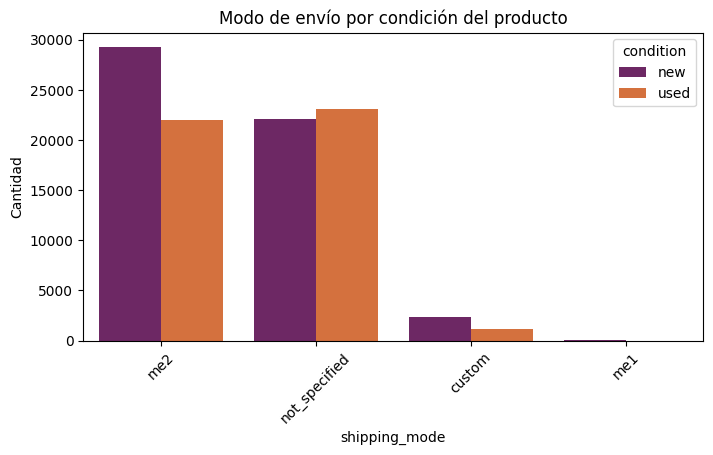

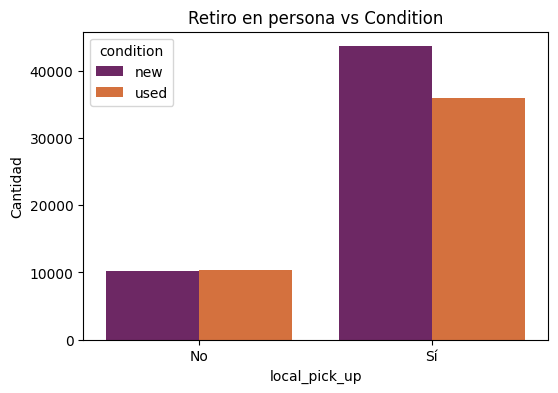

In [13]:
# Shipping info
df['is_free_shipping'] = df['shipping'].apply(lambda x: x.get('free_shipping', False) if isinstance(x, dict) else False).astype(int)
df['shipping_mode'] = df['shipping'].apply(lambda x: x.get('mode', 'unknown') if isinstance(x, dict) else 'unknown')
df['local_pick_up'] = df['shipping'].apply(lambda x: x.get('local_pick_up', False) if isinstance(x, dict) else False).astype(int)

plt.figure(figsize=(6,4))
sns.countplot(x="is_free_shipping", hue="condition", data=df, palette='inferno')
plt.title("Free shipping vs Condition")
plt.xticks([0, 1], ["No", "Sí"])
plt.ylabel("Cantidad")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x="shipping_mode", hue="condition", data=df, order=df["shipping_mode"].value_counts().index, palette='inferno')
plt.title("Modo de envío por condición del producto")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="local_pick_up", hue="condition", data=df, palette='inferno', hue_order=["new", "used"])
plt.title("Retiro en persona vs Condition")
plt.xticks([0, 1], ["No", "Sí"])
plt.ylabel("Cantidad")
plt.show()


Las variables derivadas de `shipping` muestran diferencias relevantes según la condición del producto. El envío gratis (poco comun) y el modo `me2` están más asociados a productos nuevos, mientras que los usados predominan en métodos no especificados. Además, el retiro en persona es más frecuente en nuevos, lo cual sugiere patrones logísticos diferentes según el estado del ítem.

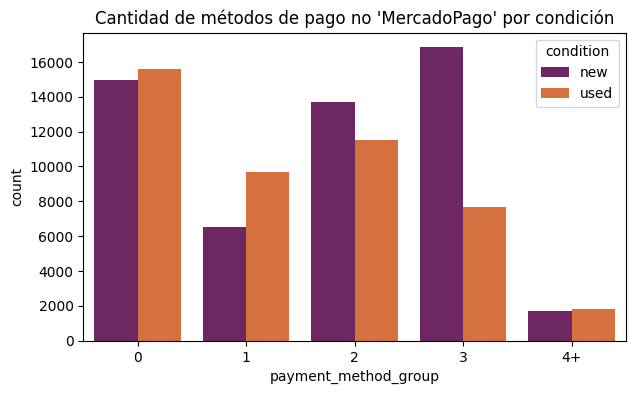

In [14]:
# Payment methods
df['payment_method_group'] = df['non_mercado_pago_payment_methods'].apply(lambda x: len(x) if isinstance(x, list) else 0).apply(lambda n: n if n <= 3 else '4+')

plt.figure(figsize=(7,4))
sns.countplot(x="payment_method_group", hue="condition", data=df, order=["0", "1", "2", "3", "4+"], palette='inferno')
plt.title("Cantidad de métodos de pago no 'MercadoPago' por condición")
plt.show()


Los productos nuevos suelen ofrecer una mayor diversidad de métodos de pago no integrados con MercadoPago, especialmente en los grupos de 2 y 3 opciones. Esta diversidad puede reflejar una estrategia comercial más estructurada en terminos de accesibilidad y flexibilidad del vendedor.

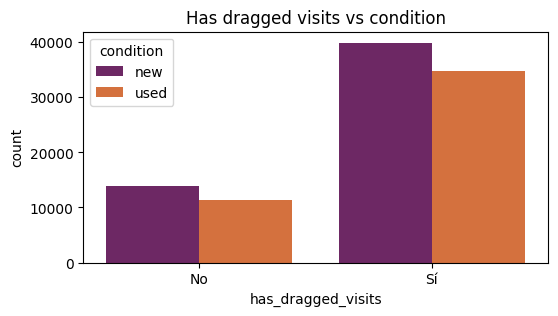

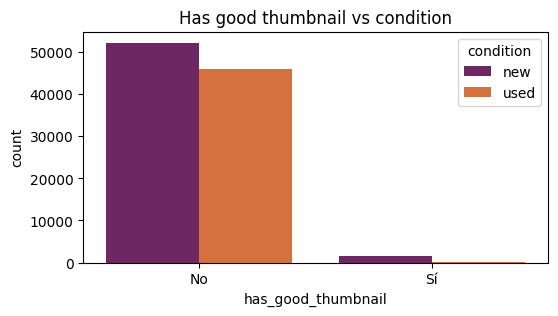

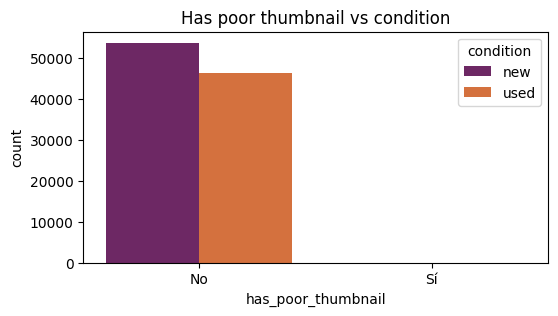

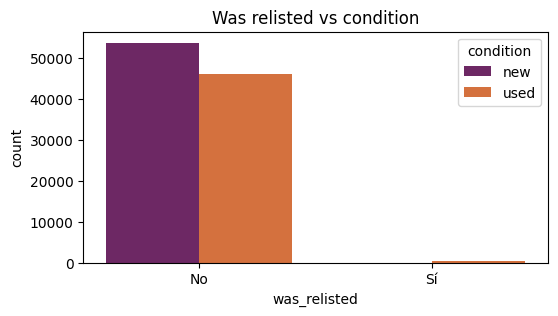

In [15]:
# Tags
df['has_dragged_visits'] = df['tags'].apply(lambda x: 'dragged_visits' in x or 'dragged_bids_and_visits' in x if isinstance(x, list) else False).astype(int)
df['has_good_thumbnail'] = df['tags'].apply(lambda x: 'good_quality_thumbnail' in x if isinstance(x, list) else False).astype(int)
df['has_poor_thumbnail'] = df['tags'].apply(lambda x: 'poor_quality_thumbnail' in x if isinstance(x, list) else False).astype(int)
df['was_relisted'] = df['tags'].apply(lambda x: 'free_relist' in x if isinstance(x, list) else False).astype(int)

tag_cols = ['has_dragged_visits', 'has_good_thumbnail', 'has_poor_thumbnail', 'was_relisted']
for col in tag_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue="condition", data=df, palette='inferno', hue_order=["new", "used"])
    plt.title(f"{col.replace('_', ' ').capitalize()} vs condition")
    plt.xticks([0, 1], ["No", "Sí"])
    plt.show()


Las etiquetas del anuncio revelan patrones útiles. La presencia de visitas arrastradas es más frecuente en productos nuevos, lo que sugiere mayor exposición. Las miniaturas de buena calidad, aunque poco comunes, aparecen más en artículos nuevos, mientras que las de baja calidad son casi inexistentes y poco discriminativas. Por último, los productos nuevos tienden a no ser republicados con mayor frecuencia, lo que puede reflejar mayor demanda. Estas variables capturan aspectos indirectos del comportamiento del vendedor y del mercado.

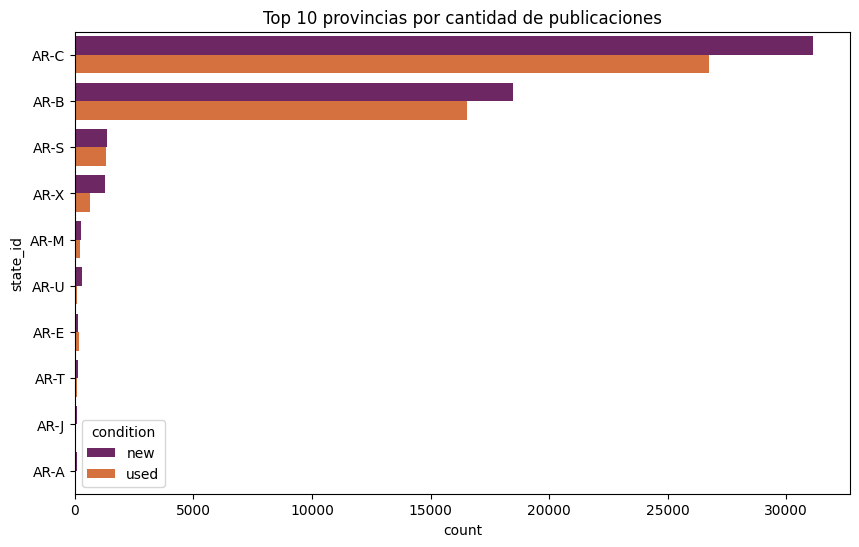

In [16]:
# Location 
df['state_id'] = df['seller_address'].apply(lambda x: x['state']['id'] if isinstance(x, dict) else 'unknown')

top_states = df['state_id'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['state_id'].isin(top_states)], y="state_id", hue="condition", order=top_states, palette='inferno')
plt.title("Top 10 provincias por cantidad de publicaciones")
plt.show()


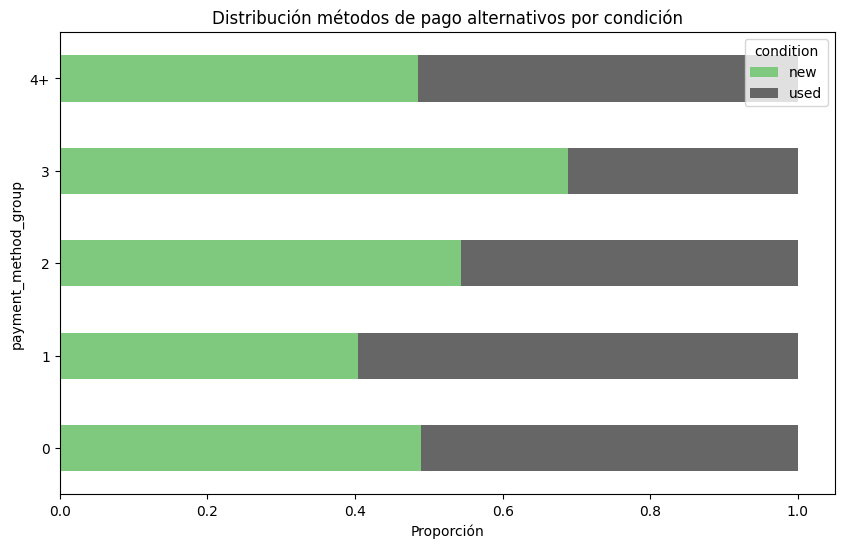

In [17]:
pay_ct = df.groupby(['payment_method_group', 'condition']).size().unstack().fillna(0)
pay_ct = pay_ct.div(pay_ct.sum(axis=1), axis=0)

pay_ct.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title("Distribución métodos de pago alternativos por condición")
plt.xlabel("Proporción")
plt.show()
